# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:01<00:00, 5.41MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
response = requests.get(url)

In [4]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
weather = tables[0]
weather.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
weather.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
results = soup(response.text, 'html.parser')

mars_data = pd.read_html(url)
mars_data





[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully
weather_df = pd.DataFrame(weather)
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
weather_df.to_json('Resources/mars_weather.json')

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
# Change data types for data analysis
# Confirm type changes were successful by examining data types again
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
months


12

Mars has 12 months - the same number of months on Earth!!!

In [33]:
# 2. How many Martian days' worth of data are there?
martian_days = weather_df['sol'].nunique()
martian_days



1867

There are 1,867 Martian days worth of data in this dataset.

In [15]:
# 3. What is the average low temperature by month?
avg_mintemp = []

for i in range(1, months):
    per_month={"month":"","avg_mintemp":""}
    avg_mintemp_month=weather_df.loc[weather_df['month']==i]['min_temp'].mean()
    round_avg_mintempmonth = round(avg_mintemp_month, 0)
    per_month["month"] = i
    per_month["avg_mintemp"] = round_avg_mintempmonth
    avg_mintemp.append(per_month)
    
avg_mintemp

[{'month': 1, 'avg_mintemp': -77.0},
 {'month': 2, 'avg_mintemp': -80.0},
 {'month': 3, 'avg_mintemp': -83.0},
 {'month': 4, 'avg_mintemp': -83.0},
 {'month': 5, 'avg_mintemp': -79.0},
 {'month': 6, 'avg_mintemp': -75.0},
 {'month': 7, 'avg_mintemp': -72.0},
 {'month': 8, 'avg_mintemp': -68.0},
 {'month': 9, 'avg_mintemp': -69.0},
 {'month': 10, 'avg_mintemp': -72.0},
 {'month': 11, 'avg_mintemp': -72.0}]

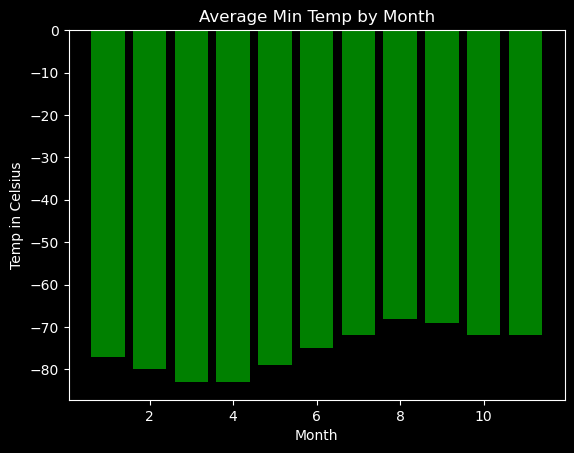

In [18]:
# Plot the average min temperature by month
min_temp = pd.DataFrame(avg_mintemp).sort_values('avg_mintemp')
min_temp

plt.bar(min_temp['month'], min_temp['avg_mintemp'], color='green')
plt.xlabel("Month")
plt.ylabel("Temp in Celsius")
plt.title("Average Min Temp by Month")
plt.savefig("Images/Avg_Mintemp_Month.png")
plt.show()

In [26]:
# Identify the coldest and hottest months in Curiosity's location
coldest = min_temp['avg_mintemp'].min()
coldest = min_temp.loc[min_temp['avg_mintemp']==coldest]
coldest



,month,avg_mintemp
2,3,-83.0
3,4,-83.0


The coldest months on Mars are the 3rd and 4th months of the Mars year.

In [28]:
# Identify the warmest month
warmest = min_temp['avg_mintemp'].max()
warmest = min_temp.loc[min_temp['avg_mintemp']==warmest]
warmest

,month,avg_mintemp
7,8,-68.0


On average, the third month and fourth months are the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

In [30]:
# 4. Average pressure by Martian month
pressure = weather.groupby('month', as_index=False)
pressure = pressure.mean().loc[:,['pressure']].sort_values('pressure')
pressure

,pressure
5,745.054422
4,748.557047
6,795.105634
3,806.329897
11,842.156627
10,857.014493
0,862.488506
7,873.829787
2,877.322917
9,887.312500


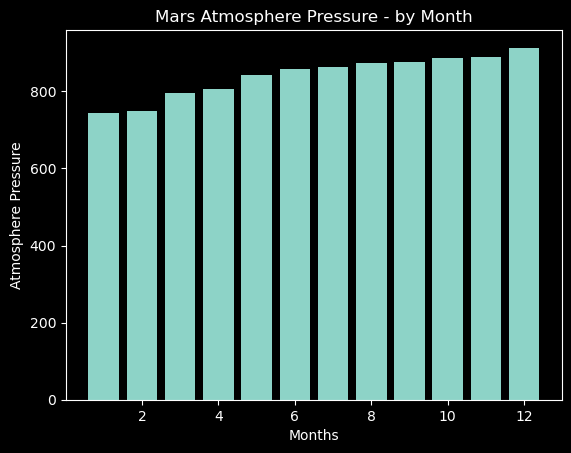

In [38]:
# Plot the average pressure by month

x_axis = range(1, 13)
plt.bar(x_axis, pressure['pressure'])
plt.title("Mars Atmosphere Pressure - by Month")
plt.xlabel("Months")
plt.ylabel("Atmosphere Pressure")
plt.savefig("Images/Pressure.png")
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?


The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
with open("Resources/weather_info", 'w') as file:
    file.write("Mars Weather Analysis")
    file.write("---------------------")
    file.write("There are 12 months on Mars.")
    file.write("The coldest months are the 3rd and 4th months.")
    file.write("The 8th month is the warmest on Mars.")
    file.write("The atmospheric pressure (on average) is lowest in the 6th month and highest in the 9th month.")
    file.write("A year on Mars is equivalent to 687 days on Earth.")

In [ ]:
browser.quit()